In [2]:
import tifffile as tiff

# Path to your .tif file
#file_path = '../data/z-volumes/fbp/FBP.tif'
#file_path = '../data/z-volumes/OSEM_it20.tif'
file_path = '../data/phase_ct/PhaseCT_reconst.tif'

# Load the volume into a NumPy array
volume = tiff.imread(file_path)

# Check the shape of the loaded volume
print(f"Volume shape: {volume.shape}")

# Check min and max values
print(f"Min: {volume.min()}, max: {volume.max()}")

Volume shape: (2302, 2304, 2304)
Min: -3720.551025390625, max: 1797.5938720703125


Draw some statistics of the volume.

In [ ]:
# Flatten the volume and plot the histogram
import matplotlib.pyplot as plt

flattened_volume = volume.flatten()
plt.figure(figsize=(6, 4))
plt.hist(flattened_volume, bins=100, color='blue', alpha=0.7)
plt.title('Histogram of Volume Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Showing a random sample from the volume.

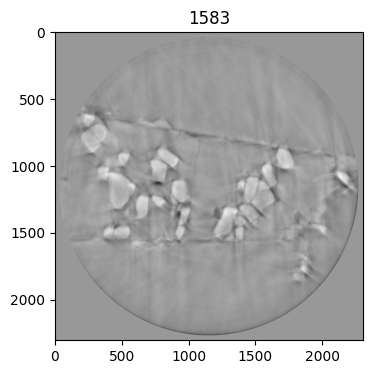

In [7]:
import matplotlib.pyplot as plt
import numpy as np

sample_id = np.random.randint(volume.shape[0])
plt.figure(figsize=[4,4])
plt.imshow(volume[sample_id], cmap='gray')
plt.title(f"{sample_id}")
plt.show()

In [4]:
volume[sample_id].min(), volume[sample_id].max()

(-1713.5632, 780.27386)

Dowsampling the volume. Warning -- this will kill your computer!

In [ ]:
# Downsampling
from scipy.ndimage import zoom

def interpolate_volume(volume, target_shape):
    zoom_factors = [t / s for t, s in zip(target_shape, volume.shape)]
    return zoom(volume, zoom=zoom_factors, order=3)     # Order=3 for cubic interpolation

# Downsampled volume
target_shape = (256, 256, 256)
volume_inter = interpolate_volume(volume, target_shape)
print(f"volume has shape {volume_inter.shape}.")

In [29]:
#volume_inter = np.swapaxes(volume_inter, 1, 2)
np.save("../data/z-volumes/volume_fbp_inter.npy", volume_inter)
print('saved.')

saved.
